## Данные: 
Данные по продажам онлайн магазина\

olist_customers_datase.csv — таблица с уникальными идентификаторами пользователей\
customer_id — позаказный идентификатор пользователя\
customer_unique_id —  уникальный идентификатор пользователя  (аналог номера паспорта)\
customer_zip_code_prefix —  почтовый индекс пользователя\
customer_city —  город доставки пользователя\
customer_state —  штат доставки пользователя\
olist_orders_dataset.csv —  таблица заказов\
order_id —  уникальный идентификатор заказа (номер чека)\
customer_id —  позаказный идентификатор пользователя\
order_status —  статус заказа\
order_purchase_timestamp —  время создания заказа\
order_approved_at —  время подтверждения оплаты заказа\
order_delivered_carrier_date —  время передачи заказа в логистическую службу\
order_delivered_customer_date —  время доставки заказа\
order_estimated_delivery_date —  обещанная дата доставки\
olist_order_items_dataset.csv —  товарные позиции, входящие в заказы\
order_id —  уникальный идентификатор заказа (номер чека)\
order_item_id —  идентификатор товара внутри одного заказа\
product_id —  ид товара (аналог штрихкода)\
seller_id — ид производителя товара\
shipping_limit_date —  максимальная дата доставки продавцом для передачи заказа партнеру по логистике\
price —  цена за единицу товара\
freight_value —  вес товара

## Задачи:
1. Сколько пользователей, которые совершили покупку только один раз?\
2. Сколько заказов в месяц в среднем не доставляется по разным причинам (вывести детализацию по причинам)?\
3. По каждому товару определить, в какой день недели товар чаще всего покупается.\
4. Сколько у каждого из пользователей в среднем покупок в неделю (по месяцам)? Не стоит забывать, что внутри месяца может быть не целое количество недель. Например, в ноябре 2021 года 4,28 недели. И внутри метрики это нужно учесть.\
5. Провести когортный анализ пользователей. В период с января по декабрь выявить когорту с самым высоким retention на 3й месяц.\ 
6. Построить RFM-сегментацию пользователей для качественного анализа аудитории

In [1]:
import pandas as pd
import numpy as np 
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import requests
from urllib.parse import urlencode
import json
from operator import attrgetter
%matplotlib inline

In [2]:
base_url = 'https://cloud-api.yandex.net/v1/disk/public/resources/download?'
link = 'https://disk.yandex.ru/d/FUi5uSd6BfG_ig'
resp = requests.get(base_url + urlencode({'public_key': link}))
csvlink = json.loads(resp.text)['href']
udf = pd.read_csv(csvlink) #открытие файла с Яндекс.Диска. Пользователи.

In [3]:
base_url = 'https://cloud-api.yandex.net/v1/disk/public/resources/download?'
link = 'https://disk.yandex.ru/d/t9Li4JOfgxuUrg'
resp = requests.get(base_url + urlencode({'public_key': link}))
csvlink = json.loads(resp.text)['href']
odf = pd.read_csv(csvlink) #открытие файла с Яндекс.Диска. Заказы.

In [4]:
base_url = 'https://cloud-api.yandex.net/v1/disk/public/resources/download?'
link = 'https://disk.yandex.ru/d/Gbt-yAcQrOe3Pw'
resp = requests.get(base_url + urlencode({'public_key': link}))
csvlink = json.loads(resp.text)['href']
oidf = pd.read_csv(csvlink) #открытие файла с Яндекс.Диска. Товарные позиции.

In [6]:
udf.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [7]:
odf.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [8]:
oidf.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [5]:
df = pd.merge(udf, odf, how = 'inner', on = 'customer_id') #соедиение двух ДФ

In [6]:
df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05 00:00:00
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06 00:00:00
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13 00:00:00
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10 00:00:00
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15 00:00:00


In [86]:
df.query("order_status in ['processing', 'shipped', 'delivered', 'invoiced', 'approved']")\
    .groupby('customer_unique_id').agg({'order_id':'count'})\
    .query('order_id == 1').shape #группировка по пользователям и аггрегация колличества покупок, сортировка тех у кого только 1 покупка

(92099, 1)

In [ ]:
# ОТВЕТ НА ЗАДАНИЕ 1. 
# 92099 пользователей со статусами в процессе сборки, отгружен со склада, доставлено, подтверждено и выставлен счет
# совершили только 1 покупку. Статусы выбраны в связи с тем, что при них есть подтверждение об оплате

In [50]:
df['order_estimated_delivery_date'] = pd.to_datetime(df.order_estimated_delivery_date)
df['esti'] = df.order_estimated_delivery_date.dt.to_period('M') #перевод к формату datetime, и далее перевод времени обещанной доставки ко времени и году

In [128]:
df.query("order_status!='delivered'").groupby(['esti','order_status'], as_index = False).agg({'order_id':'count'})\
.rename(columns=({'esti':'date', 'order_status':'reason', 'order_id':'number'}))\
.pivot(index = 'date', columns = 'reason', values= 'number').fillna(0).mean()
#ЗАДАНИЕ 2. Детализация по причинам недоставленных заказов по месяцам в среднем. 
#Недоставленные заказы отсеяны в query. Т.к. не имеют даты доставки

reason
approved        0.076923
canceled       24.038462
created         0.192308
invoiced       12.076923
processing     11.576923
shipped        42.576923
unavailable    23.423077
dtype: float64

In [26]:
df1 = pd.merge(oidf, odf, how = 'left', on = 'order_id')

The history saving thread hit an unexpected error (OperationalError('database or disk is full')).History will not be written to the database.


In [13]:
df1.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,2017-09-13 09:45:35,2017-09-19 18:34:16,2017-09-20 23:43:48,2017-09-29 00:00:00
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,2017-04-26 11:05:13,2017-05-04 14:35:00,2017-05-12 16:04:24,2017-05-15 00:00:00
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,2018-01-14 14:48:30,2018-01-16 12:36:48,2018-01-22 13:19:16,2018-02-05 00:00:00
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08 10:00:35,2018-08-08 10:10:18,2018-08-10 13:28:00,2018-08-14 13:32:39,2018-08-20 00:00:00
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04 13:57:51,2017-02-04 14:10:13,2017-02-16 09:46:09,2017-03-01 16:42:31,2017-03-17 00:00:00


In [27]:
df1['order_approved_at'] = pd.to_datetime(df1.order_approved_at)
df1.dtypes

order_id                                 object
order_item_id                             int64
product_id                               object
seller_id                                object
shipping_limit_date                      object
price                                   float64
freight_value                           float64
customer_id                              object
order_status                             object
order_purchase_timestamp                 object
order_approved_at                datetime64[ns]
order_delivered_carrier_date             object
order_delivered_customer_date            object
order_estimated_delivery_date            object
dtype: object

In [28]:
df1['weekday'] = df1.order_approved_at.dt.day_name()

In [34]:
d3f = df1.query("order_status in ['processing', 'shipped', 'delivered', 'invoiced', 'approved']")\
.groupby(['product_id','weekday'], as_index=False).agg({'price':'count'})

In [35]:
d3f.loc[d3f.groupby('product_id')['price'].idxmax()]
#ОТВЕТ НА ЗАДАНИЕ 3. По каждому товару определить, в какой день недели товар чаще всего покупается.

,product_id,weekday,price
0,00066f42aeeb9f3007548bb9d3f33c38,Sunday,1
1,00088930e925c41fd95ebfe695fd2655,Tuesday,1
2,0009406fd7479715e4bef61dd91f2462,Friday,1
3,000b8f95fcb9e0096488278317764d19,Friday,1
5,000d9be29b5207b54e86aa1b1ac54872,Tuesday,1
...,...,...,...
60785,fff6177642830a9a94a0f2cba5e476d1,Monday,1
60787,fff81cc3158d2725c0655ab9ba0f712c,Monday,1
60788,fff9553ac224cec9d15d49f5a263411f,Saturday,1
60791,fffdb2d0ec8d6a61f0a0a0db3f25b441,Tuesday,3


In [236]:
df['app_weeks'] = df.order_approved_at.dt.daysinmonth/7
df['app_month'] = df.order_approved_at.dt.to_period('M')

In [6]:
df['order_approved_at'] = pd.to_datetime(df.order_approved_at)

In [8]:
sumdf = df.query("order_status in ['processing', 'shipped', 'delivered', 'invoiced', 'approved']")\
.groupby(['customer_unique_id', 'app_month', 'app_weeks'], as_index = False).agg({'order_id':'count'})
sumdf

,customer_unique_id,app_month,app_weeks,order_id
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05,4.428571,1
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05,4.428571,1
2,0000f46a3911fa3c0805444483337064,2017-03,4.428571,1
3,0000f6ccb0745a6a4b88665a16c9f078,2017-10,4.428571,1
4,0004aac84e0df4da2b147fca70cf8255,2017-11,4.285714,1
...,...,...,...,...
96841,fffcf5a5ff07b0908bd4e2dbc735a684,2017-06,4.285714,1
96842,fffea47cd6d3cc0a88bd621562a9d061,2017-12,4.428571,1
96843,ffff371b4d645b6ecea244b27531430a,2017-02,4.000000,1
96844,ffff5962728ec6157033ef9805bacc48,2018-05,4.428571,1


In [9]:
sumdf['purchases_per_week'] = sumdf.order_id / sumdf.app_weeks

In [10]:
sumdf
# ОТВЕТ НА ЗАДАНИЕ №4. Сколько у каждого из пользователей в среднем покупок в неделю (по месяцам)?

,customer_unique_id,app_month,app_weeks,order_id,purchases_per_week
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05,4.428571,1,0.225806
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05,4.428571,1,0.225806
2,0000f46a3911fa3c0805444483337064,2017-03,4.428571,1,0.225806
3,0000f6ccb0745a6a4b88665a16c9f078,2017-10,4.428571,1,0.225806
4,0004aac84e0df4da2b147fca70cf8255,2017-11,4.285714,1,0.233333
...,...,...,...,...,...
96841,fffcf5a5ff07b0908bd4e2dbc735a684,2017-06,4.285714,1,0.233333
96842,fffea47cd6d3cc0a88bd621562a9d061,2017-12,4.428571,1,0.225806
96843,ffff371b4d645b6ecea244b27531430a,2017-02,4.000000,1,0.250000
96844,ffff5962728ec6157033ef9805bacc48,2018-05,4.428571,1,0.225806


In [237]:
fodf = df.query("order_status in ['processing', 'shipped', 'delivered', 'invoiced', 'approved']")\
.groupby('customer_unique_id', as_index = False).agg({'app_month':'min'})\
.rename(columns = ({'app_month':'first_order'})) #месяц первой покупки
fodf

,customer_unique_id,first_order
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05
2,0000f46a3911fa3c0805444483337064,2017-03
3,0000f6ccb0745a6a4b88665a16c9f078,2017-10
4,0004aac84e0df4da2b147fca70cf8255,2017-11
...,...,...
94981,fffcf5a5ff07b0908bd4e2dbc735a684,2017-06
94982,fffea47cd6d3cc0a88bd621562a9d061,2017-12
94983,ffff371b4d645b6ecea244b27531430a,2017-02
94984,ffff5962728ec6157033ef9805bacc48,2018-05


In [238]:
cdf = pd.merge(df.query("order_status in ['processing', 'shipped', 'delivered', 'invoiced', 'approved']"), fodf, how='inner', on='customer_unique_id')
#соединение дф с первой покупкой с дф содержащем заказы

In [239]:
cdf.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,app_weeks,app_month,first_order
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05 00:00:00,4.428571,2017-05,2017-05
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06 00:00:00,4.428571,2018-01,2018-01
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13 00:00:00,4.428571,2018-05,2018-05
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10 00:00:00,4.428571,2018-03,2018-03
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15 00:00:00,4.428571,2018-07,2018-07


In [253]:
dfm=cdf.groupby(['first_order', 'app_month'], as_index=False).agg({'customer_unique_id':'nunique'}) #группировка по первой покупке и времени покупки, аггрегация по уникальным пользователям

In [254]:
dfm['tdif'] = (dfm.app_month - dfm.first_order).apply(attrgetter('n')) #расчет разницы между покупкой и первой покупкой и вывод кол-ва месяцев

In [255]:
dfm = dfm.rename(columns=({'customer_unique_id':'numbers_orders'}))
dfm.head()

,first_order,app_month,numbers_orders,tdif
0,2016-09,2016-09,1,0
1,2016-10,2016-10,291,0
2,2016-10,2017-04,1,6
3,2016-10,2017-07,1,9
4,2016-10,2017-09,1,11


In [258]:
dfm = dfm.pivot(index='first_order', columns = 'tdif', values = 'numbers_orders')
dfm
#преобразование таблицы по периодам

tdif,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,19,20
first_order,,,,,,,,,,,,,,,,,,,,
2016-09,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-10,291.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN,1.0,NaN,1.0,NaN,1.0,NaN,1.0,2.0,2.0
2016-12,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01,716.0,4.0,2.0,1.0,3.0,1.0,3.0,1.0,1.0,NaN,2.0,2.0,5.0,3.0,1.0,1.0,2.0,3.0,1.0,NaN
2017-02,1674.0,4.0,4.0,3.0,7.0,2.0,4.0,3.0,1.0,3.0,2.0,5.0,2.0,3.0,2.0,1.0,1.0,4.0,NaN,NaN
2017-03,2580.0,13.0,9.0,9.0,9.0,4.0,4.0,8.0,8.0,3.0,10.0,3.0,6.0,3.0,4.0,6.0,2.0,4.0,NaN,NaN
2017-04,2301.0,14.0,5.0,4.0,6.0,6.0,8.0,6.0,8.0,4.0,5.0,2.0,2.0,1.0,2.0,2.0,3.0,NaN,NaN,NaN
2017-05,3543.0,19.0,17.0,14.0,11.0,12.0,15.0,5.0,9.0,9.0,10.0,12.0,7.0,2.0,7.0,8.0,NaN,NaN,NaN,NaN
2017-06,3110.0,14.0,11.0,12.0,8.0,11.0,11.0,7.0,4.0,7.0,10.0,11.0,5.0,4.0,6.0,NaN,NaN,NaN,NaN,NaN


In [259]:
xd = dfm.iloc[:, 0]

In [260]:
retention = dfm.divide(xd, axis=0) # для получения retention rate, все значения должны быть разделены на значения столбца 0

In [265]:
retention.style.format("{:.2%}", na_rep="") #перевод десятичных значений в проценты и замена значений NaN с помощью команды format
#ЗАДАНИЕ №5. Используя pandas, проведи когортный анализ пользователей. 
#В период с января по декабрь выяви когорту с самым высоким retention на 3й месяц.
#ОТВЕТ: Когорта с наивысшим retantion за 3й месяц - 2017-05 с значением 0.40%

tdif,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,19,20
first_order,,,,,,,,,,,,,,,,,,,,
2016-09,100.00%,,,,,,,,,,,,,,,,,,,
2016-10,100.00%,,,,,,0.34%,,,0.34%,,0.34%,,0.34%,,0.34%,,0.34%,0.69%,0.69%
2016-12,100.00%,100.00%,,,,,,,,,,,,,,,,,,
2017-01,100.00%,0.56%,0.28%,0.14%,0.42%,0.14%,0.42%,0.14%,0.14%,,0.28%,0.28%,0.70%,0.42%,0.14%,0.14%,0.28%,0.42%,0.14%,
2017-02,100.00%,0.24%,0.24%,0.18%,0.42%,0.12%,0.24%,0.18%,0.06%,0.18%,0.12%,0.30%,0.12%,0.18%,0.12%,0.06%,0.06%,0.24%,,
2017-03,100.00%,0.50%,0.35%,0.35%,0.35%,0.16%,0.16%,0.31%,0.31%,0.12%,0.39%,0.12%,0.23%,0.12%,0.16%,0.23%,0.08%,0.16%,,
2017-04,100.00%,0.61%,0.22%,0.17%,0.26%,0.26%,0.35%,0.26%,0.35%,0.17%,0.22%,0.09%,0.09%,0.04%,0.09%,0.09%,0.13%,,,
2017-05,100.00%,0.54%,0.48%,0.40%,0.31%,0.34%,0.42%,0.14%,0.25%,0.25%,0.28%,0.34%,0.20%,0.06%,0.20%,0.23%,,,,
2017-06,100.00%,0.45%,0.35%,0.39%,0.26%,0.35%,0.35%,0.23%,0.13%,0.23%,0.32%,0.35%,0.16%,0.13%,0.19%,,,,,


In [7]:
df.query("order_status in ['processing', 'shipped', 'delivered', 'invoiced', 'approved']").shape

(98202, 12)

In [8]:
df['app_days'] = df.order_approved_at.dt.to_period('D') # приведение столбца со временем покупки к дню, месяцу и году

In [9]:
lpdf = df.query("order_status in ['processing', 'shipped', 'delivered', 'invoiced', 'approved']")\
.groupby('customer_unique_id', as_index = False).agg({'app_days':'max'}).rename(columns=({'app_days':'last_purch'})) 
lpdf #вычисление даты последней покупки для пользователя

,customer_unique_id,last_purch
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05-10
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05-07
2,0000f46a3911fa3c0805444483337064,2017-03-10
3,0000f6ccb0745a6a4b88665a16c9f078,2017-10-12
4,0004aac84e0df4da2b147fca70cf8255,2017-11-14
...,...,...
94981,fffcf5a5ff07b0908bd4e2dbc735a684,2017-06-08
94982,fffea47cd6d3cc0a88bd621562a9d061,2017-12-10
94983,ffff371b4d645b6ecea244b27531430a,2017-02-07
94984,ffff5962728ec6157033ef9805bacc48,2018-05-02


In [10]:
lpdf['dif_from_tdy'] = ((df.app_days.max() + 1) - lpdf.last_purch.dropna()).apply(attrgetter('n'))
#расчет количества дней с момента последней покупки покупку +1 день (сделал такой промежуток потому что дф не слишком свеж на сегодня)

In [11]:
lpdf

,customer_unique_id,last_purch,dif_from_tdy
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05-10,117.0
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05-07,120.0
2,0000f46a3911fa3c0805444483337064,2017-03-10,543.0
3,0000f6ccb0745a6a4b88665a16c9f078,2017-10-12,327.0
4,0004aac84e0df4da2b147fca70cf8255,2017-11-14,294.0
...,...,...,...
94981,fffcf5a5ff07b0908bd4e2dbc735a684,2017-06-08,453.0
94982,fffea47cd6d3cc0a88bd621562a9d061,2017-12-10,268.0
94983,ffff371b4d645b6ecea244b27531430a,2017-02-07,574.0
94984,ffff5962728ec6157033ef9805bacc48,2018-05-02,125.0


In [12]:
aodf = df.query("order_status in ['processing', 'shipped', 'delivered', 'invoiced', 'approved']")\
.groupby('customer_unique_id', as_index = False).agg({'order_id':'count'}).rename(columns=({'order_id':'all_orders'}))
aodf #создание датафрейма с колличеством покупок по пользователям

,customer_unique_id,all_orders
0,0000366f3b9a7992bf8c76cfdf3221e2,1
1,0000b849f77a49e4a4ce2b2a4ca5be3f,1
2,0000f46a3911fa3c0805444483337064,1
3,0000f6ccb0745a6a4b88665a16c9f078,1
4,0004aac84e0df4da2b147fca70cf8255,1
...,...,...
94981,fffcf5a5ff07b0908bd4e2dbc735a684,1
94982,fffea47cd6d3cc0a88bd621562a9d061,1
94983,ffff371b4d645b6ecea244b27531430a,1
94984,ffff5962728ec6157033ef9805bacc48,1


In [13]:
asdf = pd.merge(df.query("order_status in ['processing', 'shipped', 'delivered', 'invoiced', 'approved']")[['order_id', 'customer_unique_id']], oidf, how = 'inner', on = 'order_id')
asdf

,order_id,customer_unique_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00e7ee1b050b8499577073aeb2a297a1,861eff4711a542e4b93843c6dd7febb0,1,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-05-22 15:22:12,124.99,21.88
1,29150127e6685892b6eab3eec79f59c7,290c77bc529b7ac935b93aa66c333dc3,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-01-18 20:58:32,289.00,46.48
2,b2059ed67ce144a36e2aa97d2c9e9ad2,060e732b5b29e8181a18229c7b0b2b5e,1,bd07b66896d6f1494f5b86251848ced7,7c67e1448b00f6e969d365cea6b010ab,2018-06-05 16:19:10,139.94,17.79
3,951670f92359f4fe4a63112aa7306eba,259dac757896d24d7702b9acbbff3f3c,1,a5647c44af977b148e0a3a4751a09e2e,7c67e1448b00f6e969d365cea6b010ab,2018-03-27 16:31:16,149.94,23.36
4,6b7d50bd145f6fc7f33cebabd7e49d0f,345ecd01c38d18a9036ed96c73b8d066,1,9391a573abe00141c56e38d84d7d5b3b,4a3ca9315b744ce9f8e9374361493884,2018-07-31 10:10:09,230.00,22.25
...,...,...,...,...,...,...,...,...
112096,6760e20addcf0121e9d58f2f1ff14298,1a29b476fee25c95fbafc67c5ac95cf8,1,ccb4503d9d43d245d3b295d0544f988b,527801b552d0077ffd170872eb49683b,2018-04-12 16:08:45,74.90,13.88
112097,9ec0c8947d973db4f4e8dcf1fbfa8f1b,d52a67c98be1cf6a5c84435bd38d095d,1,9ede6b0570a75a4b9de4f383329f99ee,3fd1e727ba94cfe122d165e176ce7967,2018-04-10 08:35:12,114.90,14.16
112098,fed4434add09a6f332ea398efd656a5c,e9f50caf99f032f0bf3c55141f019d99,1,7a5d2e1e131a860ae7d18f6fffa9d689,d9e7e7778b32987280a6f2cb9a39c57d,2018-04-12 20:30:03,37.00,19.04
112099,e31ec91cea1ecf97797787471f98a8c2,73c2643a0a458b49f58cea58833b192e,1,f819f0c84a64f02d3a5606ca95edd272,4869f7a5dfa277a7dca6462dcf3b52b2,2017-11-09 21:15:51,689.00,22.07


In [14]:
asdf = asdf.groupby(['customer_unique_id'], as_index = False).agg({'price':'sum'}).sort_values('price')
asdf
#создание датафрейма с суммой по всем покупкам за все время

,customer_unique_id,price
80262,d80730c15c647bc8f2ad77c908ba5ca9,0.85
66698,b38211bd797f4fdd81a98b9d1754b606,0.85
18435,317cfc692e3f86c45c95697c61c853a6,2.20
70229,bd06ce0e06ad77a7f681f1a4960a3cc6,2.29
76941,cf3839da0d9492ad151690b65f45d800,2.99
...,...,...
25901,459bef486812aa25204be022145caa62,6729.00
81850,dc4802a71eae9be1dd28f5d788ceb526,6735.00
43938,763c8b1c9c68a0229c42c9fc6f662b93,7160.00
81011,da122df9eeddfedc1dc1f5349a1a690c,7388.00


In [29]:
rfm = pd.merge(lpdf[['customer_unique_id', 'dif_from_tdy']], aodf, how = 'inner', on = 'customer_unique_id')
rfm = pd.merge(rfm, asdf[['customer_unique_id', 'price']], how = 'left', on = 'customer_unique_id')
rfm = rfm.dropna()

In [30]:
rfm = rfm.rename(columns = {'dif_from_tdy':'recency', 'all_orders':'frequency', 'price':'monetary'})
rfm #создание итогового датафрейма

,customer_unique_id,recency,frequency,monetary
0,0000366f3b9a7992bf8c76cfdf3221e2,117.0,1,129.90
1,0000b849f77a49e4a4ce2b2a4ca5be3f,120.0,1,18.90
2,0000f46a3911fa3c0805444483337064,543.0,1,69.00
3,0000f6ccb0745a6a4b88665a16c9f078,327.0,1,25.99
4,0004aac84e0df4da2b147fca70cf8255,294.0,1,180.00
...,...,...,...,...
94981,fffcf5a5ff07b0908bd4e2dbc735a684,453.0,1,1570.00
94982,fffea47cd6d3cc0a88bd621562a9d061,268.0,1,64.89
94983,ffff371b4d645b6ecea244b27531430a,574.0,1,89.90
94984,ffff5962728ec6157033ef9805bacc48,125.0,1,115.00


In [28]:
quintiles = rfm[['recency', 'frequency', 'monetary']].quantile([.2, .4, .6, .8, 0.99]).to_dict()
quintiles #создание 5и квантилей для оценки RFM

{'recency': {0.2: 98.0, 0.4: 182.0, 0.6: 273.0, 0.8: 389.0, 0.99: 581.0},
 'frequency': {0.2: 1.0, 0.4: 1.0, 0.6: 1.0, 0.8: 1.0, 0.99: 2.0},
 'monetary': {0.2: 39.9, 0.4: 69.9, 0.6: 109.9, 0.8: 179.9, 0.99: 1004.99}}

In [33]:
def r_score(x):
    if x <= quintiles['recency'][.2]:
        return 6
    elif x <= quintiles['recency'][.4]:
        return 5
    elif x <= quintiles['recency'][.6]:
        return 4
    elif x <= quintiles['recency'][.8]:
        return 3
    elif x <= quintiles['recency'][.99]:
        return 2
    else:
        return 1

def fm_score(x, c):
    if x <= quintiles[c][.2]:
        return 1
    elif x <= quintiles[c][.4]:
        return 2
    elif x <= quintiles[c][.6]:
        return 3
    elif x <= quintiles[c][.8]:
        return 4
    elif x <= quintiles[c][.99]:
        return 5
    else:
        return 6   
#методы для выставления баллов метрикам
rfm['R'] = rfm['recency'].apply(lambda x: r_score(x))
rfm['F'] = rfm['frequency'].apply(lambda x: fm_score(x, 'frequency'))
rfm['M'] = rfm['monetary'].apply(lambda x: fm_score(x, 'monetary'))
#применение методов

In [35]:
rfm['RFM Score'] = rfm['R'].map(str) + rfm['F'].map(str) + rfm['M'].map(str) #объединение оценок в результирующий столбец с баллами
rfm.head() 

,customer_unique_id,recency,frequency,monetary,R,F,M,RFM Score
0,0000366f3b9a7992bf8c76cfdf3221e2,117.0,1,129.90,5,1,4,514
1,0000b849f77a49e4a4ce2b2a4ca5be3f,120.0,1,18.90,5,1,1,511
2,0000f46a3911fa3c0805444483337064,543.0,1,69.00,2,1,2,212
3,0000f6ccb0745a6a4b88665a16c9f078,327.0,1,25.99,3,1,1,311
4,0004aac84e0df4da2b147fca70cf8255,294.0,1,180.00,3,1,5,315


In [48]:
segt_map = {
    r'[1-2]1': 'спящие',
    r'[2-3][1-2]': 'рискованные',
    r'[1-2][5-6]': 'нельзя потерять их',
    r'[3-4][4-6]': 'лояльные пользователи',
    r'41': 'перспективные',
    r'[5-6]1': 'новые пользователи',
    r'[4-5][4-6]': 'потенциально лояльные',
    r'[5-6][4-6]': 'чемпионы'
}

rfm['Segment'] = rfm['R'].map(str) + rfm['F'].map(str)
rfm['Segment'] = rfm['Segment'].replace(segt_map, regex=True)
rfm.head() 
#разделение пользователей по сегментам-кластерям
# спящие, те кто делал мало покупок и давно
# рискованные, те кто сделал нескольких покупок, не так давно
# нельзя потерять их, те кто делал много покупок, но давно и по какой то причине перестал их делать
# лояльные пользователи, стабильные пользователи, совершающие по несколько покупок не так давно
# перспективные, те, кто сделал немного покупок недавно и перестал покупать
# новые пользователи, кто сделал немного покупок недавно
# потенциально лояльные,  кто сделал не так давно много покупок
# чемпионы, недавно купили много покупок


,customer_unique_id,recency,frequency,monetary,R,F,M,RFM Score,Segment
0,0000366f3b9a7992bf8c76cfdf3221e2,117.0,1,129.90,5,1,4,514,новые пользователи
1,0000b849f77a49e4a4ce2b2a4ca5be3f,120.0,1,18.90,5,1,1,511,новые пользователи
2,0000f46a3911fa3c0805444483337064,543.0,1,69.00,2,1,2,212,спящие
3,0000f6ccb0745a6a4b88665a16c9f078,327.0,1,25.99,3,1,1,311,рискованные
4,0004aac84e0df4da2b147fca70cf8255,294.0,1,180.00,3,1,5,315,рискованные


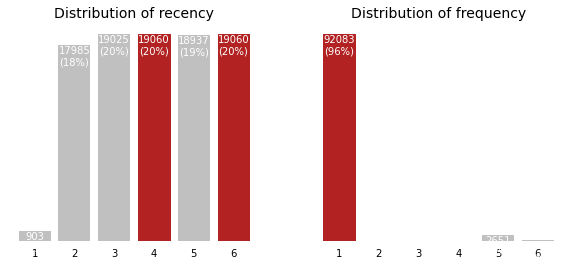

In [49]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))
for i, p in enumerate(['R', 'F']):
    parameters = {'R':'recency', 'F':'frequency'}
    y = rfm[p].value_counts().sort_index()
    x = y.index
    ax = axes[i]
    bars = ax.bar(x, y, color='silver')
    ax.set_frame_on(False)
    ax.tick_params(left=False, labelleft=False, bottom=False)
    ax.set_title('Distribution of {}'.format(parameters[p]),
                fontsize=14)
    for bar in bars:
        value = bar.get_height()
        if value == y.max():
            bar.set_color('firebrick')
        ax.text(bar.get_x() + bar.get_width() / 2,
                value - 5,
                '{}\n({}%)'.format(int(value), int(value * 100 / y.sum())),
               ha='center',
               va='top',
               color='w')
#визуализация распределения новизны и частоты

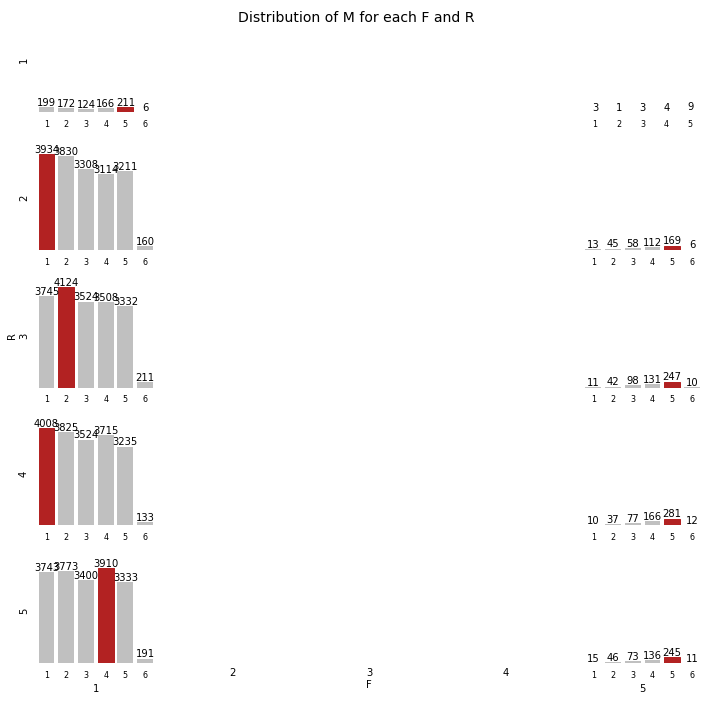

In [50]:
fig, axes = plt.subplots(nrows=5, ncols=5,
                         sharex=False, sharey=True,
                         figsize=(10, 10))

r_range = range(1, 6)
f_range = range(1, 6)
for r in r_range:
    for f in f_range:
        y = rfm[(rfm['R'] == r) & (rfm['F'] == f)]['M'].value_counts().sort_index()
        x = y.index
        ax = axes[r - 1, f - 1]
        bars = ax.bar(x, y, color='silver')
        if r == 5:
            if f == 3:
                ax.set_xlabel('{}\nF'.format(f), va='top')
            else:
                ax.set_xlabel('{}\n'.format(f), va='top')
        if f == 1:
            if r == 3:
                ax.set_ylabel('R\n{}'.format(r))
            else:
                ax.set_ylabel(r)
        ax.set_frame_on(False)
        ax.tick_params(left=False, labelleft=False, bottom=False)
        ax.set_xticks(x)
        ax.set_xticklabels(x, fontsize=8)

        for bar in bars:
            value = bar.get_height()
            if value == y.max():
                bar.set_color('firebrick')
            ax.text(bar.get_x() + bar.get_width() / 2,
                    value,
                    int(value),
                    ha='center',
                    va='bottom',
                    color='k')
fig.suptitle('Distribution of M for each F and R',
             fontsize=14)
plt.tight_layout()
plt.show()
#визуализация распределения денег для каждой новизны и частоты

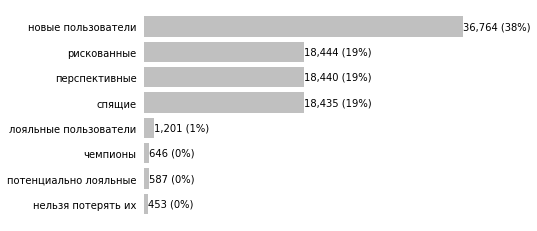

In [51]:
# распределение пользователей по сегментам
segments_counts = rfm['Segment'].value_counts().sort_values(ascending=True)

fig, ax = plt.subplots()

bars = ax.barh(range(len(segments_counts)),
              segments_counts,
              color='silver')
ax.set_frame_on(False)
ax.tick_params(left=False,
               bottom=False,
               labelbottom=False)
ax.set_yticks(range(len(segments_counts)))
ax.set_yticklabels(segments_counts.index)

for i, bar in enumerate(bars):
        value = bar.get_width()
        if segments_counts.index[i] in ['champions', 'loyal customers']:
            bar.set_color('firebrick')
        ax.text(value,
                bar.get_y() + bar.get_height()/2,
                '{:,} ({:}%)'.format(int(value),
                                   int(value*100/segments_counts.sum())),
                va='center',
                ha='left'
               )

plt.show()
#ОТВЕТ НА ЗАДАНИЕ №5. 6. Часто для качественного анализа аудитории использую подходы, основанные на сегментации.
# Используя python, построй RFM-сегментацию пользователей, чтобы качественно оценить свою аудиторию. 
# В кластеризации можешь выбрать следующие метрики: R - время от последней покупки пользователя до текущей даты,
# F - суммарное количество покупок у пользователя за всё время,
# M - сумма покупок за всё время.